<a href="https://colab.research.google.com/github/JAEHYEONG8121/Pytorch-Tutorial/blob/main/Transfer_Learning_%26_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning & Fine Tuning

> Transfer Learning is a machine learning technique where a pre-trained model, originally trained on a large dataset for a specific tast, is adapted to a different but related task.
***

**Key Concepts of Transfer Learning**

1. Pre-trained Model

2. Source Task and Target Tast
  - Source Task : The original task on which the model was trained
  - Target Tast : The new task to which model is being adapted

3. Feature Extraction

4. Fine-Tuning

***

**Key Steps in Fine-Tuning**

1. Load the Pre-trained Model

2. Modify the Output Layer

3. Freeze Initial Layers

4. Train the Modified Layerrs

5. Optional Unfreezing and Fine-Tuning

6. Evaluate and Adjusy

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision

In [40]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
# Hyperparameters
in_channel = 3
num_classes = 10
learning_rate = 1e-3
batch_size = 1024
num_epochs = 5

- We use CIFAR10 dataset
- So the ouput of model should be number 10
- Origin Vgg16 model has avgpool -> AdaptiveAvgPool2d(output_size=(7,7))
- But, we get output 1x1x10, so we don't need avgpool
- And also, out_features should be 10
- We should remove avgpooling and change out_features number to 10

***
## Version 1

In [47]:
#import sys

class Identity(nn.Module):
  def __init__(self):
    super(Identity, self).__init__()

  def forward(self, x):
    return x

# Load pretrain model & modify it
model = torchvision.models.vgg16(pretrained=False)


# 1. remove avgpool
model.avgpool = Identity()

# 2. change out_features to 10 by using just one layer
model.classifier = nn.Linear(512, 10) # We can change all classifier by this code / if we code model.classfier[0] = nn.Linear(512, 10) -> we only can change the first one
model.to(device)


#print(model)
#sys.exit()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Another examples

### change classifer

model.classifier = nn.Sequential(nn.Linear(512, 100),
                                 nn.Dropout(p=0.5),
                                 nn.Linear(100, 10))

for i in range(1, 7):
  model.classifier[i] = Identity()

<br>

### Freeze all layers, and back prop only last layer

for param in model.parameters():
  param.requires_grad = False


***
##Version2

In [32]:
#import sys

class Identity(nn.Module):
  def __init__(self):
    super(Identity, self).__init__()

  def forward(self, x):
    return x

# Load pretrain model & modify it
model = torchvision.models.vgg16(pretrained=True)


# Freeze all layers, and back prop only last layer

for param in model.parameters():
  param.requires_grad = False


# 1. remove avgpool
model.avgpool = Identity()

# 2. change out_features to 10 by using just one layer
model.classifier = nn.Sequential(nn.Linear(512, 100),
                                 nn.ReLU(),
                                 nn.Linear(100, 10)) # We can change all classifier by this code / if we code model.classfier[0] = nn.Linear(512, 10) -> we only can change the first one
model.to(device)


#print(model)
#sys.exit()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [48]:
# Load Data
train_dataset = datasets.CIFAR10(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


In [49]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [50]:
#Train Network
for epoch in range(num_epochs):
  losses = []

  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to cuda if possible
    data = data.to(device=device)
    targets = targets.to(device=device)

    # forward
    scores = model(data)
    loss = criterion(scores, targets)

    losses.append(loss.item())

    # backward
    optimizer.zero_grad()
    loss.backward()

    # gradient descent of adam step
    optimizer.step()

  print(f'Cost at epoch {epoch} is {sum(losses)/len(losses)}')

Cost at epoch 0 is 2.3171882969992503
Cost at epoch 1 is 2.0880811311760725
Cost at epoch 2 is 1.822820680482047
Cost at epoch 3 is 1.64486533768323
Cost at epoch 4 is 1.484041505930375


In [51]:
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else :
        print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device).squeeze(1)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'Got {num_correct} / {num_samples} with accuracy \
              {float(num_correct)/float(num_samples)*100:.2f}')

In [52]:
check_accuracy(train_loader, model)

Checking accuracy on training data
Got 21919 / 50000 with accuracy               43.84


1. All layers caculate back prop(pretrained=False)

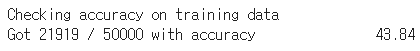

***

2. Version 2

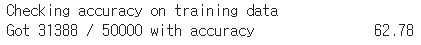

##Version1 vs Version2
> Let's compare v1 and v2

<br>

***

###Version1

1. **No pre-trained weights(pretrained=False)**
  - model is initialized with random weights
  - training starts from the beggining using the CIFAR-10 dataset.

2. **Removing the average pooling layer**

3. **Simple classifier modification**
  - the final layer is replaced with a single linear layer tailored for CIFAR-10


***

###Version2


1. **Using pre-trained weights(pretrained=True)**
  - the model is initialized with weights pre-trained on the ImageNet dataset
  - starts with well-trained weights, potentially leading to faster convergence


2. **Freezing layers**
  - keeps the pre-trained weights fixed, training only last layer
  - Leverage the knowledge from the pre-training

3. **Removing the average pooling layer**

4. **Complex classifier modification**
  - changes the classifier to a more complex structure with two linear layers and a ReLU activation function
  - Allows for more refined training tailored to the CIFAR-10 dataset

***

###Significance of the Comparison


1. **Impact of initial weights**
  - in the first method, the model starts training from scratch, which can be slower and may require more data and time
  - in the second method, using pre-trained weights can lead to faster training and good performance with less data

2. **Generalization capability**
  - the first method might overfit to the specific dataset
  - the second method, using pre-trained weights, may generalize better as it already learned diverse features

3. **Training efficiency**
  - the second methond reduces the number of parameters to train by freezing most layers, enchancing efficiency
  - the first method trains all parameters, requiring more computational resources

4. **Performance comparsion**
  - comparing the performance of both method helps evaluate the benefits of using pre-trained weights and freezing layers
  - it also assesses the impact of a more complex classifier structure on performance